In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

markers = {'Uniform': '--*',
           'Isotropic': '--^', 'Isotropic (av.)': '--^', 'Isotropic (sup.)': ':v',
           'A posteriori': '--s', 'A posteriori (av.)': '--s', 'A posteriori (sup.)': ':D',
           'A priori': '--x', 'A priori (av.)': '--x', 'A priori (sup.)': ':+'}
colours = {'Uniform': 'b',
           'Isotropic': 'g', 'Isotropic (av.)': 'g', 'Isotropic (sup.)': 'g',
           'A posteriori': 'tab:orange', 'A posteriori (av.)': 'tab:orange', 'A posteriori (sup.)': 'tab:orange',
           'A priori': 'm', 'A priori (av.)': 'm', 'A priori (sup.)': 'm'}

Convergence of analytical solution using numerical quadrature:

|i|`num_cells`|$J$ centred|$J$ non-centred|
|-|-----------|-----------|---------------|
|0|4000       |0.20757181237574668|0.08881679566591627|
|1|16000      |0.16904453786011625|0.07205849758858487|
|2|64000      |0.1626252970746482|0.0692420492072838|
|3|256000     |0.1634413876801883|0.06959054400723866|
|4|1024000    |__0.16344445064259913__|__0.06959262675303893__|

In [3]:
def create_dict(centred=True, second_order=False):
    """
    Create a dictionary for containing data relating to the TELEMAC-2D convergence plots.
    Analytic and uniform mesh runs are already entered.

    :kwarg centred: Toggle whether to consider a region of interest which is centred or offset from the flow.
    :kwarg second_order: Toggle whether combined metrics are used.
    """
    dat = {}
    dat['Uniform'] = {}
    dat['Uniform']['elements'] = [4000, 16000, 64000, 256000, 1024000]
    if centred:
        dat['Uniform']['qoi'] = [2.0547e-01, 1.6873e-01, 1.6259e-01, 1.6343e-01, 1.6345e-01]
    else:
        dat['Uniform']['qoi'] = [8.9011e-02, 7.2053e-02, 6.9224e-02, 6.9580e-02, 6.9582e-02]
    if not second_order:
        dat['Isotropic'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A posteriori'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A priori'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
    else:
        dat['Isotropic (av.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['Isotropic (sup.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A posteriori (av.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A posteriori (sup.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A priori (av.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
        dat['A priori (sup.)'] = {'elements': [], 'qoi': [], 'estimator': [], 'iterations': []}
    return dat

In [4]:
def plot_qoi(dat, centred=True, title=None, filename=None, filepath='plots', err=1):
    """
    Plot QoI values for the TELEMAC-2D numerical experiments.

    :arg dat: Dictionary containing data to plot.
    :kwarg centred: Toggle whether to consider a region of interest which is centred or offset from the flow.
    :kwarg err: Relative error level of note. (Default 1%.)
    """
    J = 0.16344 if centred else 0.06959
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for approach in dat.keys():
        ax.semilogx(dat[approach]['elements'], dat[approach]['qoi'], markers[approach], color=colours[approach], label=approach)
    ax.tick_params(axis='both', which='major', labelsize=12)
    if title is not None:
        plt.title(title)
    plt.xlabel(r'Number of mesh elements', fontsize=12)
    plt.xlim([1e3, 1e6])
    n = 1 if centred else 2
    plt.ylabel(r'Quantity of interest, $J_{:d}(\phi_h)$'.format(n), fontsize=14)
    plt.ylim([J-0.01, J+0.01])
    plt.hlines(J, 700, 1.1e6)
    plt.axhspan(J*(1-err/100), J*(1+err/100), alpha=0.5, color='gray', label=r'$\pm{:.1f}\%$'.format(err))
    plt.legend(fontsize=14)
    plt.grid(True);
    if filename is not None:
        plt.savefig('{:s}/{:s}.pdf'.format(filepath, filename))

In [5]:
def plot_error(dat, centred=True, title=None, filename=None, filepath='plots', err=1):
    """
    Plot relative error in QoI values for the TELEMAC-2D numerical experiments.
    Errors are computed relative to the converged analytical value.

    :arg dat: Dictionary containing data to plot.
    :kwarg centred: Toggle whether to consider a region of interest which is centred or offset from the flow.
    :kwarg err: Relative error level of note. (Default 1%.)
    """
    J = 0.16344 if centred else 0.06959
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for approach in dat.keys():
        J_err = np.array(dat[approach]['qoi']) - J
        J_err = np.abs(J_err)
        J_err /= np.abs(J)
        dat[approach]['qoi_error'] = J_err
        ax.semilogx(dat[approach]['elements'], J_err, markers[approach], color=colours[approach], label=approach)
    ax.tick_params(axis='both', which='major', labelsize=12)
    if title is not None:
        plt.title(title)
    plt.xlabel(r'Number of mesh elements', fontsize=12)
    plt.xlim([700, 1.1e6])
    n = 1 if centred else 2
    plt.ylabel(r'Relative error in QoI, $\frac{|J_%d(\phi_h)-J_%d(\phi)|}{|J_%d(\phi)|}$' % (n,n,n), fontsize=14)
    plt.ylim([-1e-3, 0.05])
    plt.hlines(err/100, 1e2, 1e7, linestyles='dotted', label='{:.1f}\% error'.format(err))
    r = np.arange(0, 0.1, step=0.01)
    plt.yticks(r, [r'{:.1f}\%'.format(100*j) for j in r])  # Set locations and labels
    plt.legend(fontsize=14)
    plt.grid(True)
    if filename is not None:
        plt.savefig('{:s}/{:s}.pdf'.format(filepath, filename))

### Parameters

* Gradation: on
* `objective_rtol`: 0.005
* `element_rtol`: 0.005
* `estimator_atol`: 1e-8
* Base mesh: 4
* `inital_target`: 100 (error 0.01)
* `maxit`: 35

# Centred case

## Forward estimators

In [6]:
dat = create_dict(centred=True, second_order=False)

# L1 normalisation
dat['Isotropic']['elements'] = [3218, 12246, 47511, 187232]
dat['Isotropic']['qoi'] = [1.6674e-01, 1.5987e-01, 1.6299e-01, 1.6308e-01]

# L1 normalisation
dat['A posteriori']['elements'] = [5406, 16407, 63364, 223591]
dat['A posteriori']['qoi'] = [1.6547e-01, 1.6483e-01, 1.6378e-01, 1.6346e-01]

# L1 normalisation
dat['A priori']['elements'] = [2990, 8903, 44894, 234603]
dat['A priori']['qoi'] = [1.5767e-01, 1.6473e-01, 1.6430e-01, 1.6330e-01]

<IPython.core.display.Javascript object>


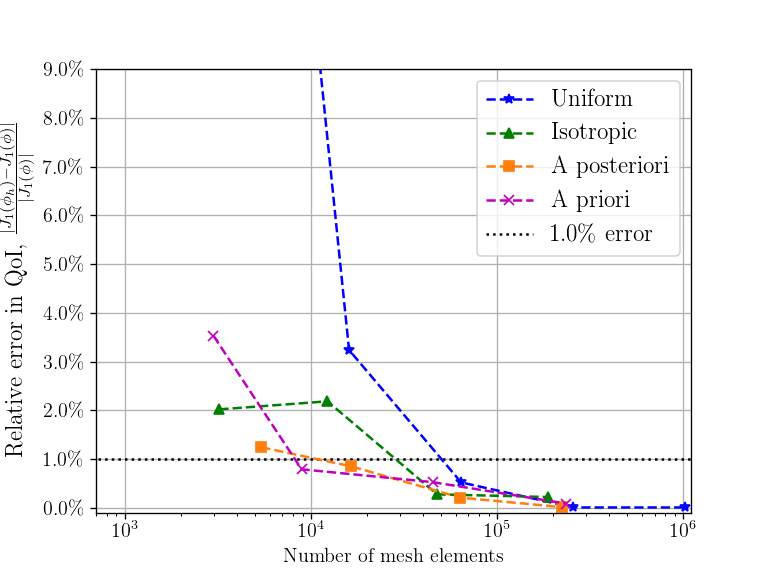

In [7]:
plot_error(dat, filename='forward_error');

## Forward + adjoint estimators

In [8]:
dat = create_dict(centred=True, second_order=True)

dat['Isotropic (av.)']['elements'] = [2044, 7089, 26792, 103183, 409857]
dat['Isotropic (av.)']['qoi'] = [1.5695e-01, 1.6565e-01, 1.6349e-01, 1.6385e-01, 1.6328e-01]

dat['Isotropic (sup.)']['elements'] = [3196, 12300, 47094, 187178]
dat['Isotropic (sup.)']['qoi'] = [1.6717e-01, 1.6545e-01, 1.6214e-01, 1.6351e-01]

dat['A posteriori (av.)']['elements'] = [1494, 4671, 16538, 61678, 229527]
dat['A posteriori (av.)']['qoi'] = [1.7074e-01, 1.6615e-01, 1.6603e-01, 1.6389e-01, 1.6362e-01]

dat['A posteriori (sup.)']['elements'] = [2286, 7084, 26116, 96002, 364060]
dat['A posteriori (sup.)']['qoi'] = [1.6937e-01, 1.6483e-01, 1.6397e-01, 1.6392e-01, 1.6362e-01]

dat['A priori (av.)']['elements'] = [3358, 10785, 45108, 234481]
dat['A priori (av.)']['qoi'] = [1.6716e-01, 1.6524e-01, 1.6402e-01, 1.6356e-01]

dat['A priori (sup.)']['elements'] = [5554, 18383, 87338, 445769]
dat['A priori (sup.)']['qoi'] = [1.6721e-01, 1.6492e-01, 1.6374e-01, 1.6354e-01]

<IPython.core.display.Javascript object>


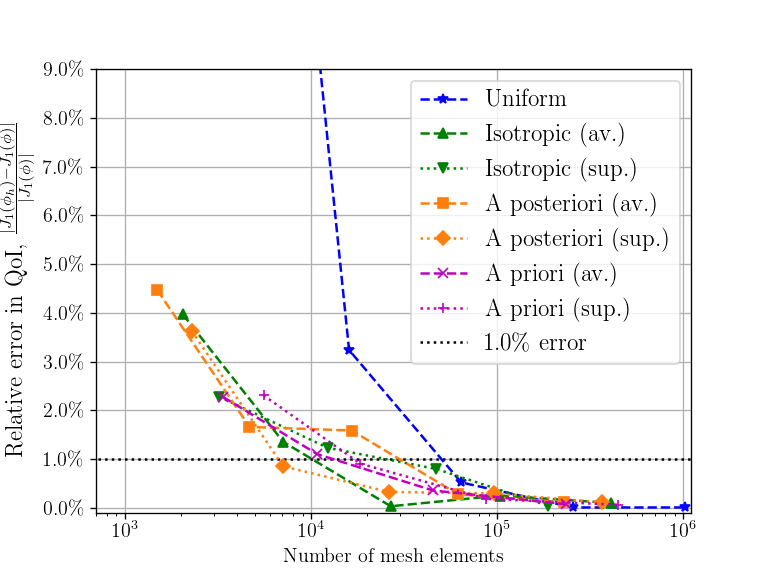

In [9]:
plot_error(dat, filename='combined_error');

# Offset case

## Forward estimators

In [10]:
dat = create_dict(centred=False, second_order=False)

# L1 normalisation
dat['Isotropic']['elements'] = [2035, 5516, 19399, 74741, 298691]
dat['Isotropic']['qoi'] = [6.8989e-02, 7.4710e-02, 7.0473e-02, 6.9860e-02, 6.9636e-02]

# L1 normalisation
dat['A posteriori']['elements'] = [2992, 9868, 38037, 135684, 476981]
dat['A posteriori']['qoi'] = [6.8006e-02, 6.9020e-02, 6.9586e-02, 6.9302e-02, 6.9571e-02]

# L1 normalisation
dat['A priori']['elements'] = [2060, 6059, 29143, 168214, 986042]
dat['A priori']['qoi'] = [7.2977e-02, 7.4019e-02, 6.8229e-02, 6.9627e-02, 6.9650e-02]

<IPython.core.display.Javascript object>


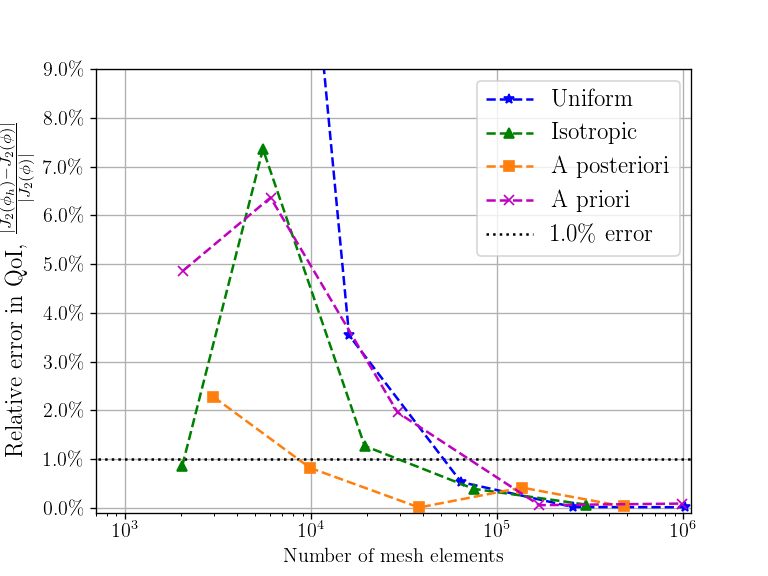

In [11]:
plot_error(dat, filename='forward_error_offset', centred=False);

## Forward + adjoint estimators

In [12]:
dat = create_dict(centred=False, second_order=True)

dat['Isotropic (av.)']['elements'] = [1448, 3986, 13980, 53831, 215196]
dat['Isotropic (av.)']['qoi'] = [7.1519e-02, 6.9259e-02, 6.9180e-02, 6.9898e-02, 6.9585e-02]

dat['Isotropic (sup.)']['elements'] = [1925, 5472, 19588, 76510]
dat['Isotropic (sup.)']['qoi'] = [7.0128e-02, 6.7232e-02, 6.9729e-02, 6.9647e-02]

dat['A posteriori (av.)']['elements'] = [2693, 9289, 35355, 129660]
dat['A posteriori (av.)']['qoi'] = [6.9707e-02, 6.9352e-02, 6.9447e-02, 6.9491e-02]

dat['A posteriori (sup.)']['elements'] = [1392, 4104, 14470, 53803, 196789]
dat['A posteriori (sup.)']['qoi'] = [6.6704e-02, 6.9271e-02, 6.9488e-02, 6.9555e-02, 6.9513e-02]

dat['A priori (av.)']['elements'] = [1838, 5667, 25204, 136091]
dat['A priori (av.)']['qoi'] = [6.8107e-02, 6.8498e-02, 6.9419e-02, 6.9588e-02]

dat['A priori (sup.)']['elements'] = [3192, 10240, 49793, 279511]
dat['A priori (sup.)']['qoi'] = [6.8526e-02, 6.9016e-02, 6.9551e-02, 6.9593e-02]

<IPython.core.display.Javascript object>


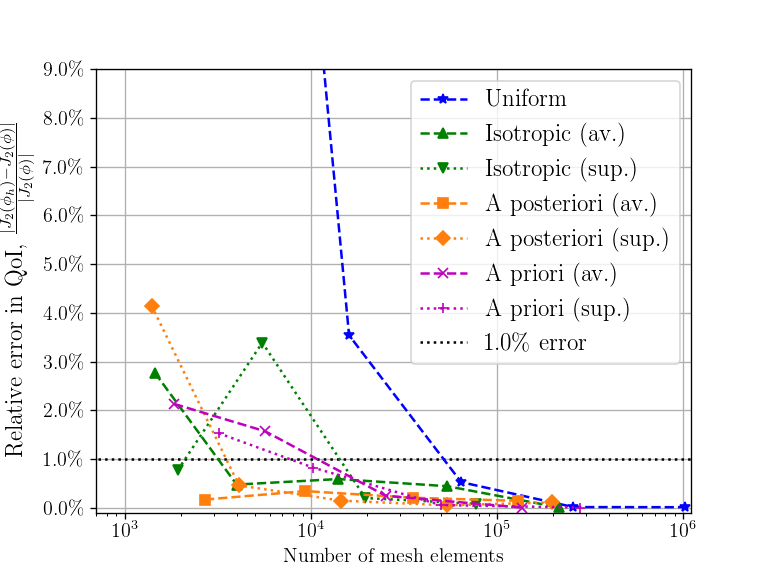

In [13]:
plot_error(dat, filename='combined_error_offset', centred=False);